In [12]:
### I want to match the resolution of a wise image with an irac image ###

In [13]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.convolution import convolve, convolve_fft, Gaussian1DKernel # convolve is better for small kernels, convolve_fft much more efficient for larger kernels (they're interchangeable); Gaussian1DKernel is just a random function I chose to make my kernels with

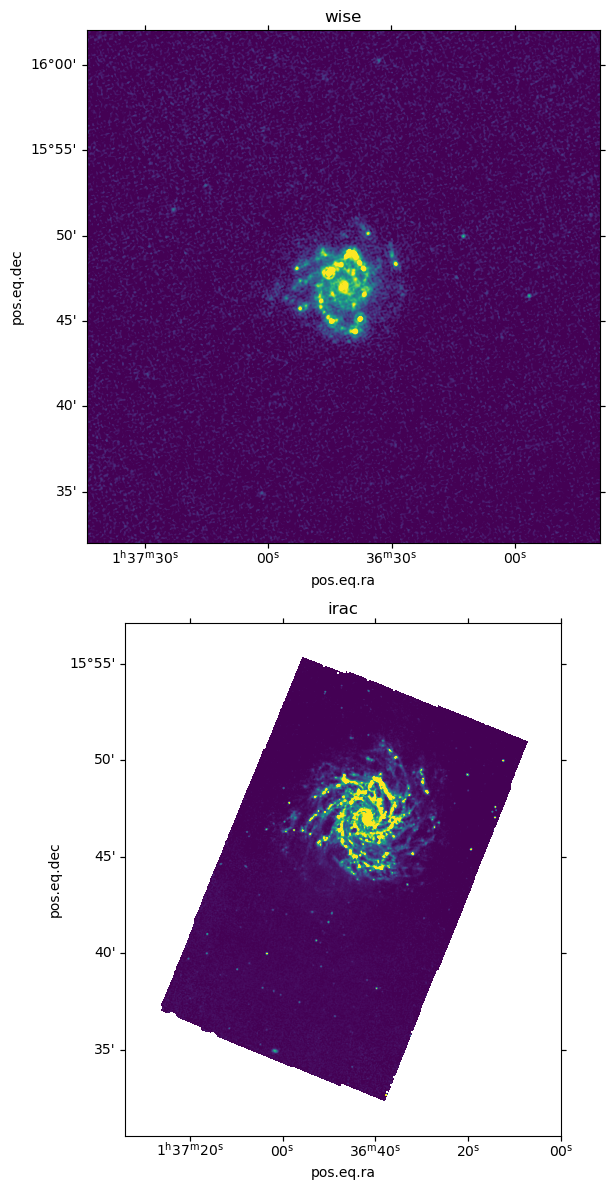

In [14]:
wise = fits.open('/Users/michaelhill/Downloads/raw_background_comps/ngc0628_w4_mjysr.fits')[0]
irac = fits.open('/Users/michaelhill/Downloads/raw_background_comps/ngc0628_irac4_gauss4.fits')[0]

wcs_wise = WCS(wise.header)
wcs_irac = WCS(irac.header)

plt.figure(figsize=(12,12))

wise_ax = plt.subplot(2,1,1, projection=wcs_wise)
wise_ax = plt.imshow(wise.data, origin='lower', vmin=-1e-4, vmax=3) # origin='lower' makes the (0,0) point the lower left corner instead of the upper right corner (it defaults to this if using WCS, but if we aren't then our images will be flipped diagonally if we don't specify origin='lower')
wise_ax = plt.title('wise')

irac_ax = plt.subplot(2,1,2, projection=wcs_irac)
irac_ax = plt.imshow(irac.data, vmin=-1e-4, vmax=3)
wisea_ax = plt.title('irac')

plt.tight_layout()
#"plt.tight_layout()" should only be executed after all data is added, otherwise it doesn't work
plt.show()

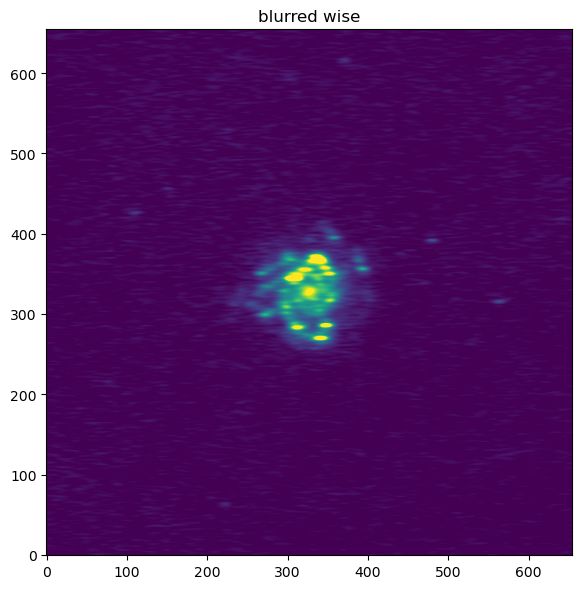

In [15]:
### I'm just gonna make an example of convolution using the Gaussian1DKernel
### the actual kernel I should use to resolution match images is what I have to figure out

kernel = Gaussian1DKernel(5)
shape = wise.data.shape
wise_conv = convolve(wise.data.flatten(), kernel)
wise_conv.shape = shape

plt.figure(figsize=(6,6))
plt.imshow(wise_conv, origin='lower', vmin=-1e-4, vmax=3)
plt.title('blurred wise')
plt.tight_layout()
plt.show()

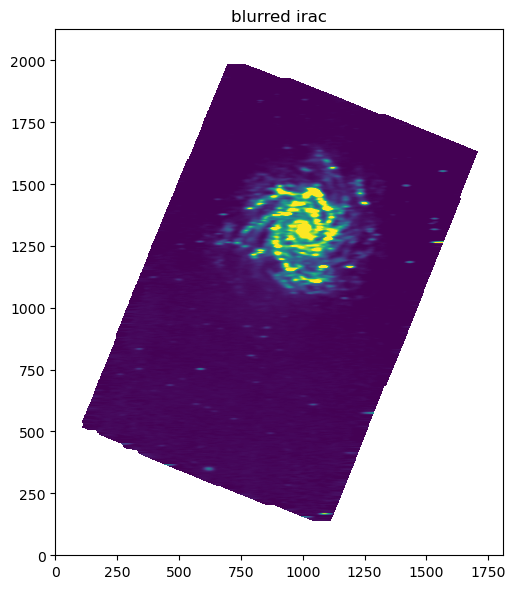

In [16]:
kernel = Gaussian1DKernel(10) # increase input for more "blurring"
shape = irac.data.shape
irac_conv = convolve(irac.data.flatten(), kernel)
irac_conv.shape = shape # converting back into 2d array so we can use imshow

plt.figure(figsize=(6,6))
plt.imshow(irac_conv, origin='lower', vmin=-1e-4, vmax=3)
plt.title('blurred irac')
plt.tight_layout()
plt.show()

# warning arises because the convolution functions replace NaN values with interpolated values using 
# the kernel as an interpolation function (without this, there are large NaN holes in the convolved array), 
# but since the irac has so many NaN values the function isn't able to fully do this

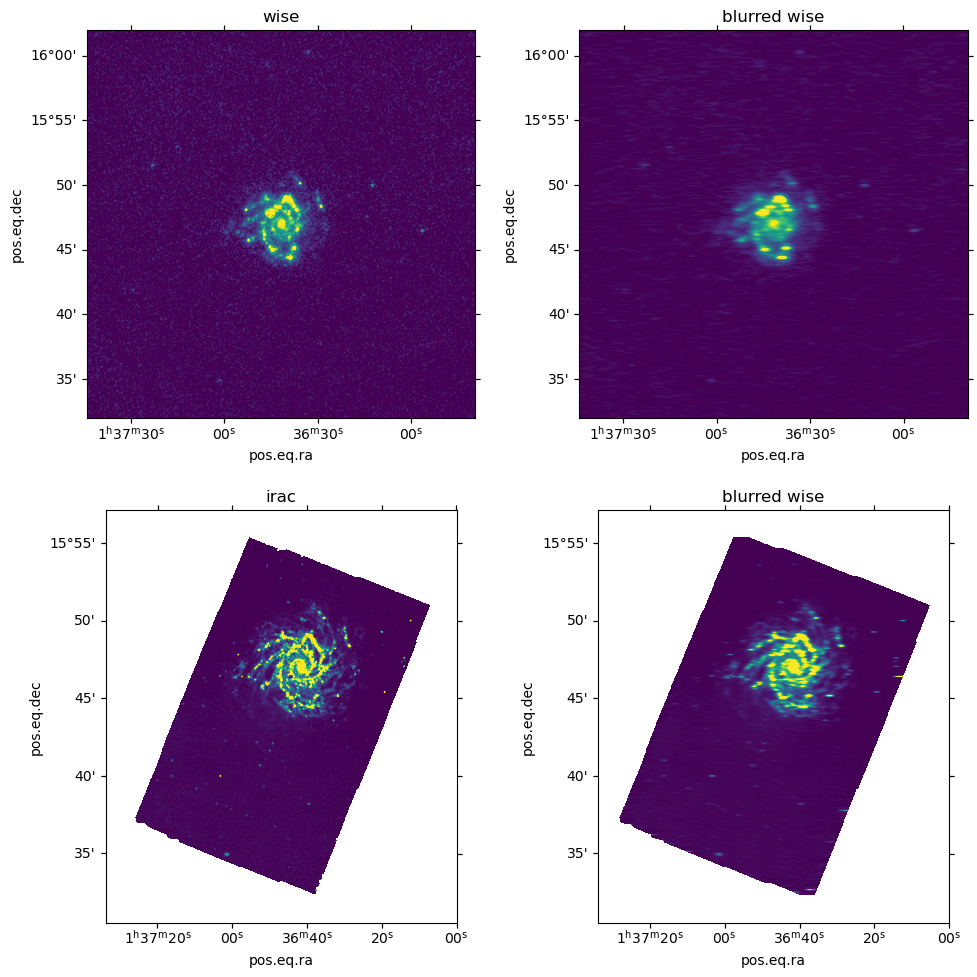

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1, projection=wcs_wise)
wise_ax = plt.imshow(wise.data, origin='lower', vmin=-1e-4, vmax=3)
wise_ax = plt.title('wise')

plt.subplot(2,2,2, projection=wcs_wise)
wise_conv_ax = plt.imshow(wise_conv, origin='lower', vmin=-1e-4, vmax=3)
wise_conv_ax = plt.title('blurred wise')

plt.subplot(2,2,3, projection=wcs_irac)
irac_ax = plt.imshow(irac.data, origin='lower', vmin=-1e-4, vmax=3)
irac_ax = plt.title('irac')

plt.subplot(2,2,4, projection=wcs_irac)
irac_conv_ax = plt.imshow(irac_conv, origin='lower', vmin=-1e-4, vmax=3)
irac_conv_ax = plt.title('blurred wise')

plt.tight_layout()
plt.show()

In [ ]:
# see normal Convolution file for possibly more detailed comments